In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# Load the Excel file
df = pd.read_excel('Spam.xlsx')
df

,Record,Spam,Recipients,Hyperlinks,Characters
0,1,0,19,1,47
1,2,0,15,1,58
2,3,1,13,11,88
3,4,1,17,11,68
4,5,0,15,1,87
...,...,...,...,...,...
495,496,0,15,2,97
496,497,0,20,5,72
497,498,1,41,11,52
498,499,1,16,11,74


In [4]:
df = df.drop(columns=['Record'])
df

,Spam,Recipients,Hyperlinks,Characters
0,0,19,1,47
1,0,15,1,58
2,1,13,11,88
3,1,17,11,68
4,0,15,1,87
...,...,...,...,...
495,0,15,2,97
496,0,20,5,72
497,1,41,11,52
498,1,16,11,74


In [5]:
df['Spam'] = df['Spam'].astype('category')

In [6]:
# Split data into train and test sets
Train_set, Test_set = train_test_split(df, test_size=0.4, random_state=1)


In [7]:
# Train the decision tree classifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(Train_set.drop(columns=['Spam']), Train_set['Spam'])

# Display summary of the tree
print("Decision Tree Summary:")
print(dt.tree_)


Decision Tree Summary:


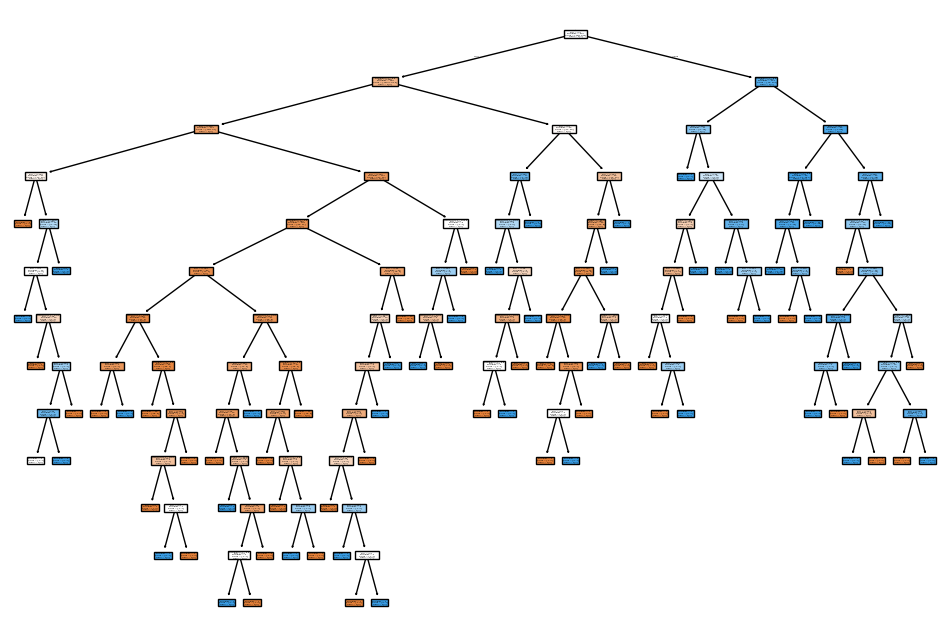

<Figure size 640x480 with 0 Axes>

In [8]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=True)
plt.show()
plt.savefig('decision_tree.png')  # Save the figure to a file

In [9]:
# Predictions on the test set
predictions = dt.predict(Test_set.drop(columns=['Spam']))
predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0])

In [10]:
# Confusion Matrix
cm = confusion_matrix(Test_set['Spam'], predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[75 19]
 [23 83]]


In [11]:
# Calculate ROC curve
probs = dt.predict_proba(Test_set.drop(columns=['Spam']))
fpr, tpr, thresholds = roc_curve(Test_set['Spam'], probs[:, 1])
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.7942091529506222


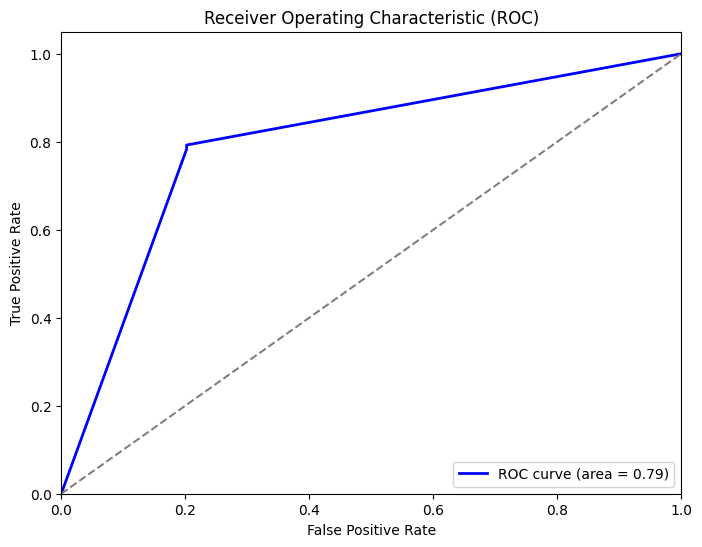

In [12]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

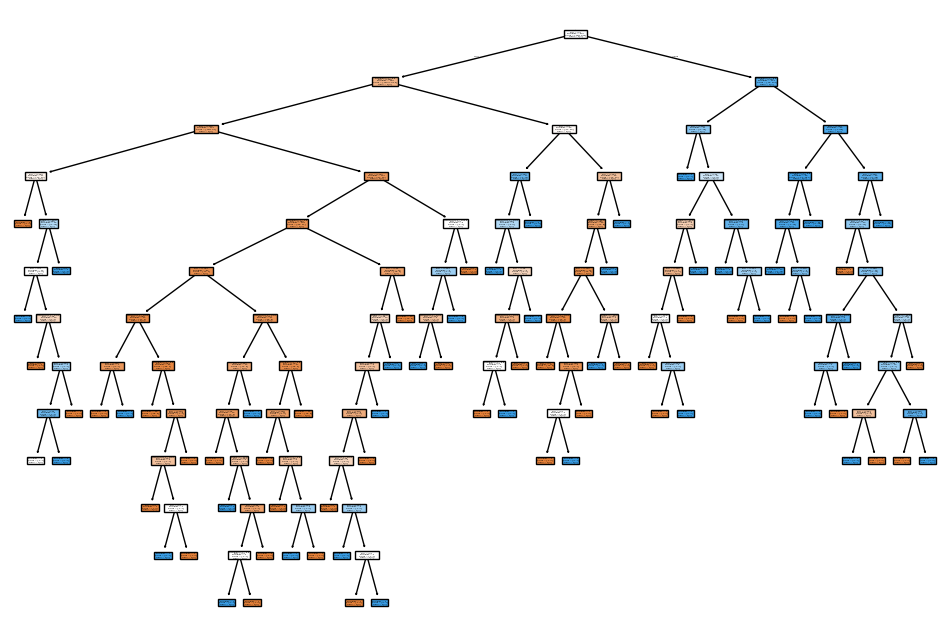

In [13]:

# Train the decision tree classifier with specified parameters
dt = DecisionTreeClassifier(random_state=1, min_samples_split=2, min_samples_leaf=1, max_depth=None)
dt.fit(Train_set.drop(columns=['Spam']), Train_set['Spam'])

# Plot the decision tree and save the figure
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=True)
plt.savefig('decision_tree1.png')  # Save the figure to a file

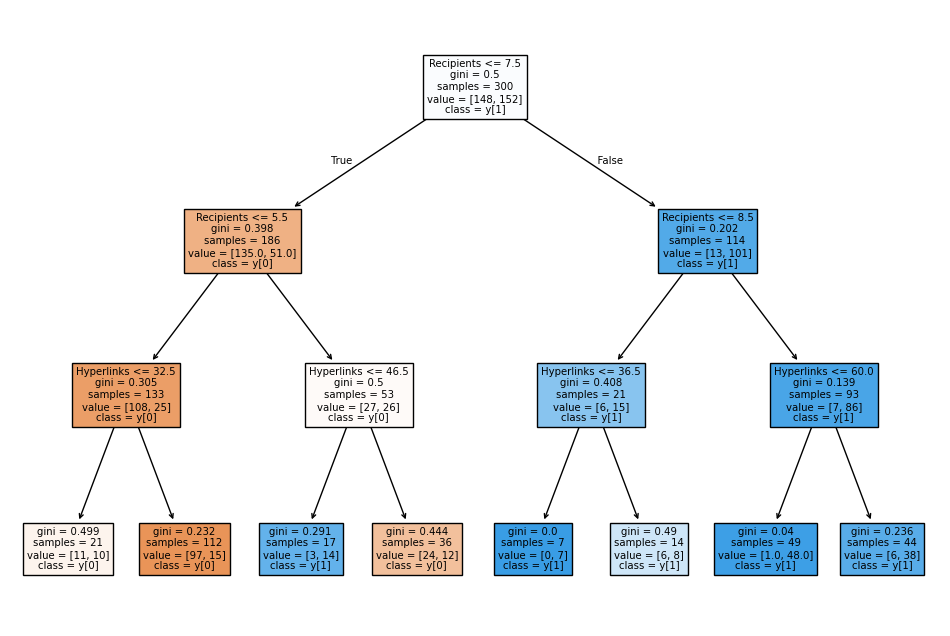

In [14]:
# Train the decision tree classifier with specified parameters
dt = DecisionTreeClassifier(random_state=1, min_samples_split=2, min_samples_leaf=1, max_depth=3)
dt.fit(Train_set.drop(columns=['Spam']), Train_set['Spam'])

# Plot the decision tree and save the figure
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=True)
plt.savefig('decision_tree1.png')  # Save the figure to a file

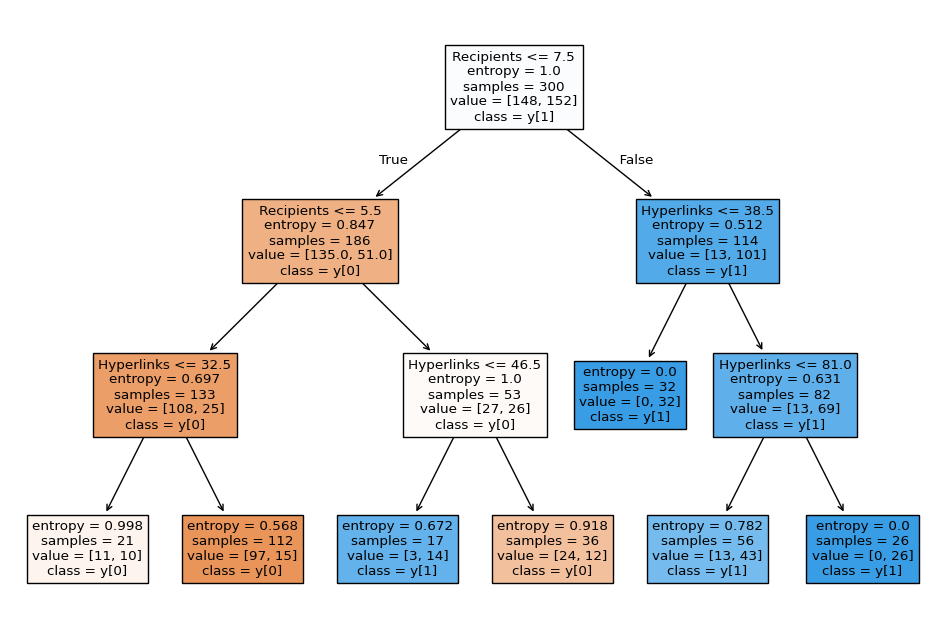

In [15]:
# Train the decision tree classifier with specified parameters
dt = DecisionTreeClassifier(random_state=1, min_samples_split=2, min_samples_leaf=1, max_depth=3, criterion='entropy')
dt.fit(Train_set.drop(columns=['Spam']), Train_set['Spam'])

# Plot the decision tree and save the figure
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=True)
plt.savefig('decision_tree1.png')  # Save the figure to a file

In [16]:
# Predictions on the test set
predictions = dt.predict(Test_set.drop(columns=['Spam']))
predictions

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0])

In [17]:
# Confusion Matrix
cm = confusion_matrix(Test_set['Spam'], predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[81 13]
 [29 77]]


In [18]:
# Calculate ROC curve
probs = dt.predict_proba(Test_set.drop(columns=['Spam']))
fpr, tpr, thresholds = roc_curve(Test_set['Spam'], probs[:, 1])
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.8587916499397833


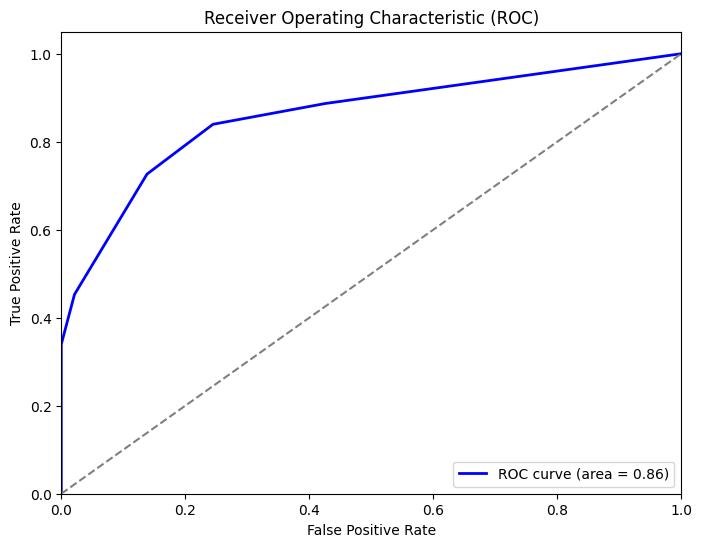

In [19]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()